In [49]:
import os
import scipy.io as sio
import numpy as np
import glob
import random
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorboard.plugins.hparams import api as hp

In [50]:
%load_ext tensorboard
#os.system("rm -rf ./logs/")

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [51]:
root = "/home/oem/PycharmProjects/lemida_hisuvit/ex3/ex3"
imglabel_map = os.path.join(root, 'imagelabels.mat')
setid_map = os.path.join(root, 'setid.mat')
imagelabels = sio.loadmat(imglabel_map)['labels'][0]
setids = sio.loadmat(setid_map)
ids = np.concatenate([setids['trnid'][0], setids['valid'][0],setids['tstid'][0]])
labels = []
image_paths = []
for i in ids:
    labels.append(int(imagelabels[i-1])-1)
    image_paths.append( os.path.join(root,"102flowers", 'jpg', 'image_{:05d}.jpg'.format(i)))


## select SEED

In [52]:
random.seed(1)
path="/home/oem/PycharmProjects/lemida_hisuvit/ex3/ex3/seed1"
output_path = "/home/oem/PycharmProjects/lemida_hisuvit/ex3/ex3/seed1/output"

In [53]:
random.seed(2)
path="/home/oem/PycharmProjects/lemida_hisuvit/ex3/ex3/seed2"
output_path = "/home/oem/PycharmProjects/lemida_hisuvit/ex3/ex3/seed2/output"

## train test splits

In [54]:
indexs = [i for i in range(len(labels))]
random.shuffle(indexs)
train_indexes = indexs[0:int(0.5*len(labels))]
validation_indexes = indexs[int(0.5*len(labels)):int(0.75*len(labels))]
test_indexes = indexs[int(0.75*len(labels)):]

### suniti check

In [55]:
train_indexes

[42,
 1102,
 6381,
 4536,
 7105,
 5281,
 3611,
 7921,
 7289,
 451,
 2294,
 2573,
 264,
 3569,
 4122,
 6196,
 7253,
 2972,
 5903,
 2684,
 5610,
 6165,
 2894,
 7617,
 6216,
 1336,
 3362,
 3146,
 5427,
 4053,
 4356,
 3773,
 7543,
 2261,
 1776,
 2425,
 5969,
 2800,
 7085,
 6058,
 6893,
 4331,
 7461,
 6063,
 4574,
 7147,
 2275,
 6691,
 6200,
 6695,
 7621,
 8085,
 7422,
 7748,
 7573,
 5993,
 2325,
 354,
 5258,
 360,
 3556,
 865,
 3188,
 1906,
 530,
 289,
 2073,
 7266,
 3784,
 2699,
 2407,
 3690,
 3916,
 6917,
 3696,
 2430,
 1219,
 3943,
 2644,
 5408,
 3161,
 5713,
 1224,
 1450,
 376,
 2106,
 3142,
 4449,
 2690,
 6721,
 4934,
 4219,
 1932,
 2580,
 6489,
 6362,
 186,
 6916,
 1042,
 1265,
 3425,
 6755,
 6451,
 4707,
 8009,
 3717,
 1182,
 6007,
 4071,
 7323,
 4227,
 2297,
 4169,
 6559,
 6014,
 6735,
 4766,
 1477,
 392,
 523,
 5643,
 1868,
 7301,
 1166,
 1804,
 7889,
 3451,
 4980,
 2643,
 1894,
 4647,
 591,
 5565,
 7657,
 2868,
 2514,
 5591,
 7930,
 1293,
 6431,
 7925,
 7587,
 3147,
 6377,
 1503,

In [56]:
image_classification = pd.DataFrame([image_paths,labels],index=["image_paths","labels"]).T
image_classification

,image_paths,labels
0,/home/oem/PycharmProjects/lemida_hisuvit/ex3/e...,0
1,/home/oem/PycharmProjects/lemida_hisuvit/ex3/e...,0
2,/home/oem/PycharmProjects/lemida_hisuvit/ex3/e...,0
3,/home/oem/PycharmProjects/lemida_hisuvit/ex3/e...,0
4,/home/oem/PycharmProjects/lemida_hisuvit/ex3/e...,0
...,...,...
8184,/home/oem/PycharmProjects/lemida_hisuvit/ex3/e...,101
8185,/home/oem/PycharmProjects/lemida_hisuvit/ex3/e...,101
8186,/home/oem/PycharmProjects/lemida_hisuvit/ex3/e...,101
8187,/home/oem/PycharmProjects/lemida_hisuvit/ex3/e...,101


In [57]:
train_labels = list(image_classification.loc[train_indexes,"labels"])
train_image_paths = list(image_classification.loc[train_indexes,"image_paths"])

validation_labels = list(image_classification.loc[validation_indexes,"labels"])
validation_image_paths = list(image_classification.loc[validation_indexes,"image_paths"])

test_labels = list(image_classification.loc[test_indexes,"labels"])
test_image_paths = list(image_classification.loc[test_indexes,"image_paths"])

In [58]:
# get the input and output path
input_path = "/home/oem/PycharmProjects/lemida_hisuvit/ex3/ex3/102flowers/jpg"
# get the class label limit
class_limit = 102
class_names =[i for i in range(0,class_limit)]



In [59]:
train_dir=os.path.join(path,"train")
validation_dir=os.path.join(path,"validation")
test_dir=os.path.join(path,"test")

## creating folders for each seed

In [60]:

# loop over the class labels
for label in class_names:
    label_path = os.path.join(path,"train", str(label))
    if not os.path.isdir(label_path):
        # create a folder for that class
        os.system("mkdir " +label_path)
for label in class_names:
    label_path=os.path.join(path,"validation", str(label))
    if not os.path.isdir(label_path):
        # create a folder for that class
        os.system("mkdir " +label_path)
for label in class_names:
    label_path=os.path.join(path,"test", str(label))
    if not os.path.isdir(label_path):
        # create a folder for that class
        os.system("mkdir " +label_path)
        
labels = train_labels
image_paths = train_image_paths
for i,label in enumerate(labels):
    cur_path=os.path.join(path,"train", str(label))
    os.system("cp " + image_paths[i] + " " +cur_path )
labels = validation_labels
image_paths = validation_image_paths
for i,label in enumerate(labels):
    cur_path=os.path.join(path,"validation", str(label))
    os.system("cp " + image_paths[i] + " " +cur_path )
labels = test_labels
image_paths = test_image_paths
for i,label in enumerate(labels):
    cur_path=os.path.join(path,"test", str(label))
    os.system("cp " + image_paths[i] + " " +cur_path )

# the transfer learning
## get train

In [61]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)


Found 4094 files belonging to 102 classes.


In [62]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)


Found 2047 files belonging to 102 classes.


In [63]:
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)


Found 2048 files belonging to 102 classes.


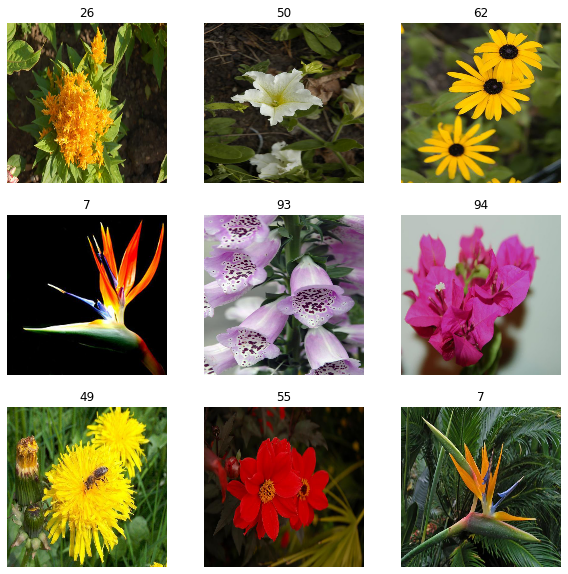

In [64]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [65]:
train_batches = tf.data.experimental.cardinality(train_dataset)
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_batches = tf.data.experimental.cardinality(test_dataset)
train_dataset = train_dataset.take(train_batches)
val_dataset = validation_dataset.take(val_batches)
test_dataset = test_dataset.take(test_batches)



In [66]:
print('Number of train batches: %d' % tf.data.experimental.cardinality(train_dataset))
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))


Number of train batches: 128
Number of validation batches: 64
Number of test batches: 64


In [67]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)


In [68]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(height_factor=(-0.05, -0.15),width_factor=(-0.05, -0.15))
])

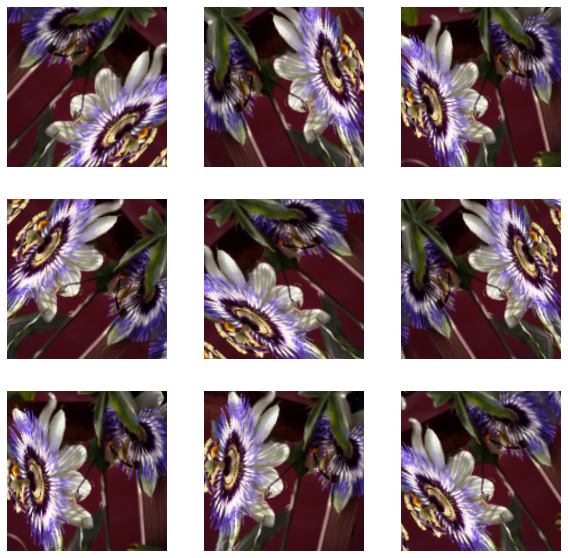

In [69]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

## preprocecing for mobilenet v2

בעוד רגע תוריד את tf.keras.applications.MobileNetV2 לשימוש כדגם הבסיס שלך. מודל זה מצפה לערכי פיקסלים ב- [-1, 1] , אך בשלב זה, ערכי הפיקסלים בתמונות שלך הם ב- [0, 255] . כדי לשנות את קנה המידה שלהם, השתמש בשיטת העיבוד המקדים הכלולה במודל.

In [70]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [71]:
IMG_SHAPE = IMG_SIZE + (3,)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [72]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [73]:
base_model.trainable = False

In [74]:
#base_model.summary()

In [75]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [76]:
prediction_layer = tf.keras.layers.Dense(class_limit,activation="softmax")
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 102)


## hyper parameters tuning

In [29]:
HP_DROPOUT = hp.HParam('dropout', hp.Discrete([0.1, 0.2,0.3]))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))
HP_LEARNING_RATE = hp.HParam('learning_rate', hp.Discrete([0.001, 0.0005, 0.0001]))

In [30]:
with tf.summary.create_file_writer(output_path+'/logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_DROPOUT, HP_OPTIMIZER,HP_LEARNING_RATE],
    metrics=[hp.Metric('accuracy', display_name='Accuracy')],
  )

In [31]:
def train_test_model(hparams):
    tf.keras.backend.clear_session()
    inputs = tf.keras.Input(shape=(160, 160, 3))
    x = data_augmentation(inputs)
    x = preprocess_input(x)
    x = base_model(x, training=False)
    x = global_average_layer(x)
    x = tf.keras.layers.Dropout(hparams[HP_DROPOUT])(x)
    outputs = prediction_layer(x)
    model = tf.keras.Model(inputs, outputs)

    for ix, layer in enumerate(model.layers):
        if hasattr(model.layers[ix], 'kernel_initializer') and \
                hasattr(model.layers[ix], 'bias_initializer'):
            weight_initializer = model.layers[ix].kernel_initializer
            bias_initializer = model.layers[ix].bias_initializer

            old_weights, old_biases = model.layers[ix].get_weights()

            model.layers[ix].set_weights([
                weight_initializer(shape=old_weights.shape),
                bias_initializer(shape=old_biases.shape)])

    learning_rate = hparams[HP_LEARNING_RATE]
    optimizer = hparams[HP_OPTIMIZER]
    if optimizer == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate*10)
    model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    initial_epochs = 18
    loss0, accuracy0 = model.evaluate(validation_dataset)
    print("initial loss: {:.2f}".format(loss0))
    print("initial accuracy: {:.2f}".format(accuracy0))
    model.fit(train_dataset,
                      use_multiprocessing=True,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)
    _, accuracy = model.evaluate(validation_dataset)

    return accuracy


In [32]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar('accuracy', accuracy, step=1)

In [33]:
session_num = 0
for learning_rate in  HP_LEARNING_RATE.domain.values:
    for dropout_rate in HP_DROPOUT.domain.values:
        for optimizer in HP_OPTIMIZER.domain.values:
            hparams = {
            HP_DROPOUT: dropout_rate,
            HP_OPTIMIZER: optimizer,
            HP_LEARNING_RATE: learning_rate,
            }
            run_name = "run-%d" % session_num
            print('--- Starting trial: %s' % run_name)
            print({h.name: hparams[h] for h in hparams})
            run(output_path+'/logs/hparam_tuning/' + run_name, hparams)
            session_num += 1

--- Starting trial: run-0
{'dropout': 0.1, 'optimizer': 'adam', 'learning_rate': 0.0001}


/home/oem/miniconda3/envs/lab_projects/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


64/64 [==============================] - 2s 22ms/step - loss: 5.0895 - accuracy: 0.0083
initial loss: 5.09
initial accuracy: 0.01
Epoch 1/18
128/128 [==============================] - 7s 40ms/step - loss: 4.5092 - accuracy: 0.0532 - val_loss: 3.9266 - val_accuracy: 0.1348
Epoch 2/18
128/128 [==============================] - 5s 39ms/step - loss: 3.5570 - accuracy: 0.1983 - val_loss: 3.2542 - val_accuracy: 0.3219
Epoch 3/18
128/128 [==============================] - 5s 34ms/step - loss: 2.9052 - accuracy: 0.3745 - val_loss: 2.7450 - val_accuracy: 0.4553
Epoch 4/18
128/128 [==============================] - 4s 31ms/step - loss: 2.4196 - accuracy: 0.4878 - val_loss: 2.3592 - val_accuracy: 0.5276
Epoch 5/18
128/128 [==============================] - 4s 32ms/step - loss: 2.0540 - accuracy: 0.5813 - val_loss: 2.0629 - val_accuracy: 0.5906
Epoch 6/18
128/128 [==============================] - 4s 32ms/step - loss: 1.7814 - accuracy: 0.6309 - val_loss: 1.8357 - val_accuracy: 0.6409
Epoch 7/18
1

In [35]:
print(output_path)#check if the plus is ok their
%tensorboard --logdir /home/oem/PycharmProjects/lemida_hisuvit/ex3/ex3/seed1/output/logs/hparam_tuning

/home/oem/PycharmProjects/lemida_hisuvit/ex3/ex3/seed1/output


Launching TensorBoard...

## make the model

In [77]:
base_learning_rate = 0.0005
dropout_rate = 0.2
optimizer = tf.keras.optimizers.Adam(learning_rate=base_learning_rate)

In [78]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(dropout_rate)(x)
outputs = prediction_layer(x)
#outputs = tf.cast(outputs, tf.int64)
#outputs = tf.one_hot(outputs, class_limit)
model = tf.keras.Model(inputs, outputs)



In [79]:
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [80]:
#model.summary()


In [81]:
len(model.trainable_variables)

2

In [82]:
initial_epochs = 18

loss0, accuracy0 = model.evaluate(validation_dataset)


/home/oem/miniconda3/envs/lab_projects/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


64/64 [==============================] - 2s 21ms/step - loss: 5.1661 - accuracy: 0.0142


In [83]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))


initial loss: 5.17
initial accuracy: 0.01


In [84]:
history = model.fit(train_dataset,
                    use_multiprocessing=True,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/18
128/128 [==============================] - 6s 33ms/step - loss: 3.4072 - accuracy: 0.2570 - val_loss: 2.2045 - val_accuracy: 0.5085
Epoch 2/18
128/128 [==============================] - 4s 32ms/step - loss: 1.5950 - accuracy: 0.6475 - val_loss: 1.4211 - val_accuracy: 0.6864
Epoch 3/18
128/128 [==============================] - 5s 41ms/step - loss: 1.0409 - accuracy: 0.7772 - val_loss: 1.1082 - val_accuracy: 0.7474
Epoch 4/18
128/128 [==============================] - 4s 32ms/step - loss: 0.7958 - accuracy: 0.8266 - val_loss: 0.9509 - val_accuracy: 0.7748
Epoch 5/18
128/128 [==============================] - 4s 32ms/step - loss: 0.6455 - accuracy: 0.8530 - val_loss: 0.8551 - val_accuracy: 0.7855
Epoch 6/18
128/128 [==============================] - 4s 32ms/step - loss: 0.5569 - accuracy: 0.8737 - val_loss: 0.7825 - val_accuracy: 0.7987
Epoch 7/18
128/128 [==============================] - 4s 32ms/step - loss: 0.4837 - accuracy: 0.8869 - val_loss: 0.7371 - val_accuracy: 0.8124

In [85]:
def acurecy_and_cross_entropy_fig(history,path_to_save):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Sparse Cross Entropy')
   # plt.ylim([0,1.0])
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.savefig(path_to_save)
    plt.show()
    return acc,val_acc,loss,val_loss

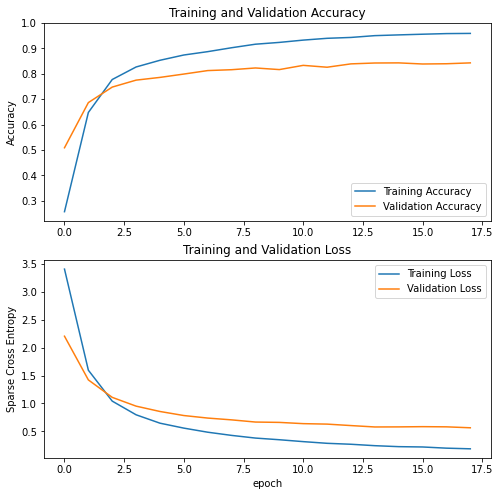

In [86]:
acc,val_acc,loss,val_loss = acurecy_and_cross_entropy_fig(history,os.path.join(output_path,"Training and Validation Loss and Accuracy.png"))

## fine tuninig of the base moodle

In [87]:
base_model.trainable = True


In [88]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [89]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [90]:
#model.summary()


In [91]:
len(model.trainable_variables)

56

In [92]:
fine_tune_epochs = 18
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                        use_multiprocessing=True,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 18/36
128/128 [==============================] - 8s 41ms/step - loss: 0.2533 - accuracy: 0.9253 - val_loss: 0.5579 - val_accuracy: 0.8476
Epoch 19/36
128/128 [==============================] - 5s 38ms/step - loss: 0.1861 - accuracy: 0.9406 - val_loss: 0.6246 - val_accuracy: 0.8456
Epoch 20/36
128/128 [==============================] - 5s 38ms/step - loss: 0.1716 - accuracy: 0.9489 - val_loss: 0.4471 - val_accuracy: 0.8779
Epoch 21/36
128/128 [==============================] - 5s 39ms/step - loss: 0.1449 - accuracy: 0.9504 - val_loss: 0.5174 - val_accuracy: 0.8661
Epoch 22/36
128/128 [==============================] - 5s 40ms/step - loss: 0.1160 - accuracy: 0.9626 - val_loss: 0.4676 - val_accuracy: 0.8803
Epoch 23/36
128/128 [==============================] - 5s 39ms/step - loss: 0.1102 - accuracy: 0.9641 - val_loss: 0.4601 - val_accuracy: 0.8745
Epoch 24/36
128/128 [==============================] - 5s 38ms/step - loss: 0.0862 - accuracy: 0.9704 - val_loss: 0.5398 - val_accuracy:

In [93]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

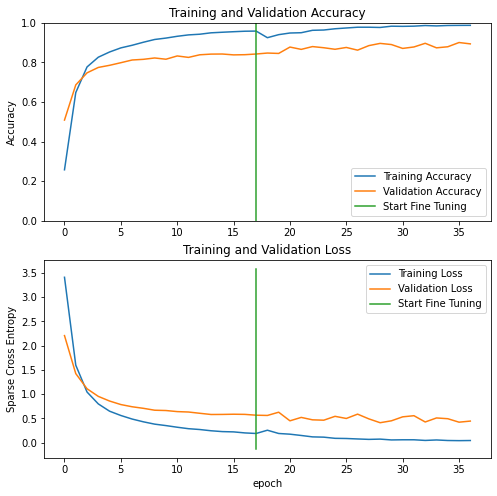

In [94]:
def acurecy_and_cross_entropy_fig_after_fine_tuning(acc,val_acc,loss,val_loss,path_to_save):
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.ylim([0, 1])
    plt.plot([initial_epochs-1,initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    #plt.ylim([0, 1.0])
    plt.plot([initial_epochs-1,initial_epochs-1],
             plt.ylim(), label='Start Fine Tuning')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.ylabel('Sparse Cross Entropy')
    plt.savefig(path_to_save)
    plt.show()
acurecy_and_cross_entropy_fig_after_fine_tuning(acc,val_acc,loss,val_loss,os.path.join(output_path,"Training and Validation Loss and Accuracy After Fine Tuning.png"))

In [95]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

64/64 [==============================] - 2s 25ms/step - loss: 0.4353 - accuracy: 0.8960
Test accuracy : 0.89599609375


In [96]:
output_path


'/home/oem/PycharmProjects/lemida_hisuvit/ex3/ex3/seed2/output'